# 🍕 Climate Data Pizza: Order, Customize, and Enjoy Your Data Slice!
## Let’s look at climate data access from a fun angle, imagine it’s like ordering a pizza !
> **Disclaimer:**  
> This Jupyter notebook was developed at the **German Climate Computing Center (DKRZ)** for **educational purposes only**.  
> It is intended to illustrate concepts and workflows, not for operational or production use. The content is provided *"as is"* without any warranty or guarantee of accuracy.


In [1]:
# Import the tools for our pizza kitchen
from pyesgf.search import SearchConnection
from rooki import operators as ops
from IPython.display import Image
import os

# 1. 🏪 Enter the Pizza Shop
We connect to the ESGF data catalog at DKRZ – this is like entering a pizza shop that specializes in climate data. The distrib=False parameter means we're only looking at the "fresh, locally available ingredients" (data stored at DKRZ), not checking other shops.

In [2]:
print("Step 1: Entering the ESGF pizza shop at DKRZ...")
conn = SearchConnection('http://esgf-data.dkrz.de/esg-search', distrib=False)
print("✅ Connected! We're only looking at DKRZ's fresh ingredients (local data)")

Step 1: Entering the ESGF pizza shop at DKRZ...
✅ Connected! We're only looking at DKRZ's fresh ingredients (local data)


# 2. 📖 Check the Menu
We browse the available CMIP6 "pizzas" (datasets) on the menu. This is like filtering the menu to only show premium pizzas (CMIP6 project) that are currently in stock (available at DKRZ nodes) and are the latest version (freshly made).

In [3]:
print("\nStep 2: Checking the menu for CMIP6 pizzas...")
ctx = conn.new_context(project='CMIP6', 
                      data_node='esgf1.dkrz.de,esgf3.dkrz.de', 
                      latest=True, 
                      replica=True)
print(f"🍕 Found {ctx.hit_count} different pizzas on the menu!")


Step 2: Checking the menu for CMIP6 pizzas...
🍕 Found 537279 different pizzas on the menu!


# 3. 🎯 Choose Your Pizza
*We select a specific pizza from the menu – in this case, an EC-Earth3 SSP585 daily temperature pizza. This is like telling the chef exactly which pizza we want, including the specific ingredients (model, experiment, variable, and frequency).*

In [4]:
print("\nStep 3: Choosing our favorite pizza - EC-Earth3 SSP585 temperature...")
results = ctx.search(
    institution_id='EC-Earth-Consortium',
    source_id='EC-Earth3', 
    experiment_id='ssp585',
    variable='tas',  # temperature topping
    frequency='day', # daily slices
    variant_label='r1i1p1f1'
)

ds = results[0]
dataset_id = ds.json['instance_id']
print(f"✅ Selected: {dataset_id}")
print(f"📅 Available from: {ds.json['datetime_start']} to {ds.json['datetime_stop']}")
print(f"📏 Size: {ds.json['size'] / 1024 / 1024 / 1024:.2f} GB (that's a big pizza!)")


Step 3: Choosing our favorite pizza - EC-Earth3 SSP585 temperature...
✅ Selected: CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.r1i1p1f1.day.tas.gr.v20200310
📅 Available from: 2015-01-01T12:00:00Z to 2100-12-31T12:00:00Z
📏 Size: 11.31 GB (that's a big pizza!)


# 4. 🧑‍🍳 Place Your Order
We set up our connection to the Rook WPS service – this is like giving our order to the pizza kitchen. The async mode means "we'll call you when it's ready" so we can do other things while our data pizza is being prepared.

In [5]:
print("\nStep 4: Placing our order with the Rook pizza chefs...")
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'  # Our pizza kitchen
os.environ['ROOK_MODE'] = 'async'  # "We'll call you when it's ready"



Step 4: Placing our order with the Rook pizza chefs...


# 5. ✂️ Customize Your Slice
We specify exactly how we want our data pizza prepared:

Time range: 2016-2031 (16 years of delicious data)

Region: Europe bounding box (-1,41,15,51)

Processing: Averaged over time for smoother flavor

This is like asking for specific slices (subset) and extra blending (averaging) of your pizza.

In [6]:
print("\nStep 5: Customizing our pizza slice...")
print("   - Time range: 2016-01-01 to 2031-12-31 (16 years of delicious data)")
print("   - Region: Europe bounding box (-1,41,15,51)")
print("   - Extra: Averaged over time for smoother flavor")

tas = ops.Input('tas', [dataset_id])  # Base pizza
sub = ops.Subset(tas, time="2016-01-01/2031-12-31", area="-1.0,41.0,15.0,51.0")
wf = ops.Average(sub, dims="time")  # Blend for consistent flavor


Step 5: Customizing our pizza slice...
   - Time range: 2016-01-01 to 2031-12-31 (16 years of delicious data)
   - Region: Europe bounding box (-1,41,15,51)
   - Extra: Averaged over time for smoother flavor


# 6. ⏳ Wait for Delivery
We submit our order and wait for processing. This is like the kitchen preparing our customized pizza – it might take some time, especially for large orders, so we use async mode to avoid waiting at the counter.

In [7]:
print("\nStep 6: Cooking in progress... (async mode)")
resp = wf.orchestrate()

if resp.ok:
    print("✅ Order accepted! Your data pizza is being prepared...")
    print(f"📦 Will be delivered to: {resp.url}")
else:
    print("❌ Oh no! The kitchen is closed. Please check your order.")


Step 6: Cooking in progress... (async mode)
✅ Order accepted! Your data pizza is being prepared...
📦 Will be delivered to: http://rook7.cloud.dkrz.de:80/outputs/rook/7bb58c44-baf6-11f0-9568-fa163eb671ca/input.meta4


# 7. 🎉 Enjoy Your Pizza
Our data pizza is ready! We get:

Number of slices: How many files were generated

Slice size: How much data we're getting

Download URL: Where to pick up our pizza

This is like getting our pizza box with all the delicious slices inside.

In [8]:
print("\nStep 7: Your data pizza is ready!")
print(f"🍕 Number of slices (files): {resp.num_files}")
print(f"📊 Slice size: {resp.size_in_mb:.2f} MB")
print(f"🔗 Download URL: {resp.download_urls()[0]}")


Step 7: Your data pizza is ready!
🍕 Number of slices (files): 1
📊 Slice size: 0.03 MB
🔗 Download URL: http://rook7.cloud.dkrz.de:80/outputs/rook/9cb44ad4-baf6-11f0-94dd-fa163eb671ca/tas_day_EC-Earth3_ssp585_r1i1p1f1_gr_avg-t.nc


# 8. 🎨 Add Final Touches
We create a visualization of our data – this is like arranging our pizza slices on a plate for a beautiful presentation. The heatmap shows the temperature patterns across our selected region.


Step 8: Adding the final touches - visualization!
📈 Plotting temperature data... (your pizza presentation)
✅ Beautiful! Your climate data pizza is served!


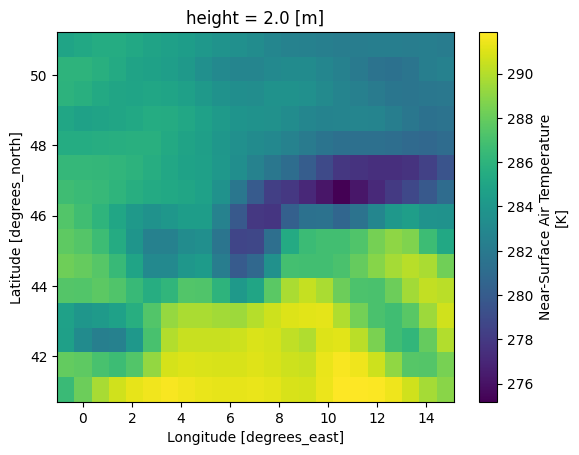

In [9]:
print("\nStep 8: Adding the final touches - visualization!")
ds_0 = resp.datasets()[0]  # Get our first slice
print("📈 Plotting temperature data... (your pizza presentation)")

# Plot the averaged temperature
ds_0.tas.plot()  # This creates the heatmap visualization
print("✅ Beautiful! Your climate data pizza is served!")

# 9. 📋 Keep the Recipe
We save the provenance information – this is like getting the exact recipe used to make our pizza. The JSON document contains all ingredients and steps, while the flowchart shows the cooking process visually.


Step 9: Saving the recipe for next time...
📄 Full recipe (provenance): http://rook7.cloud.dkrz.de:80/outputs/rook/7bb58c44-baf6-11f0-9568-fa163eb671ca/provenance.json
📊 Cooking flowchart:


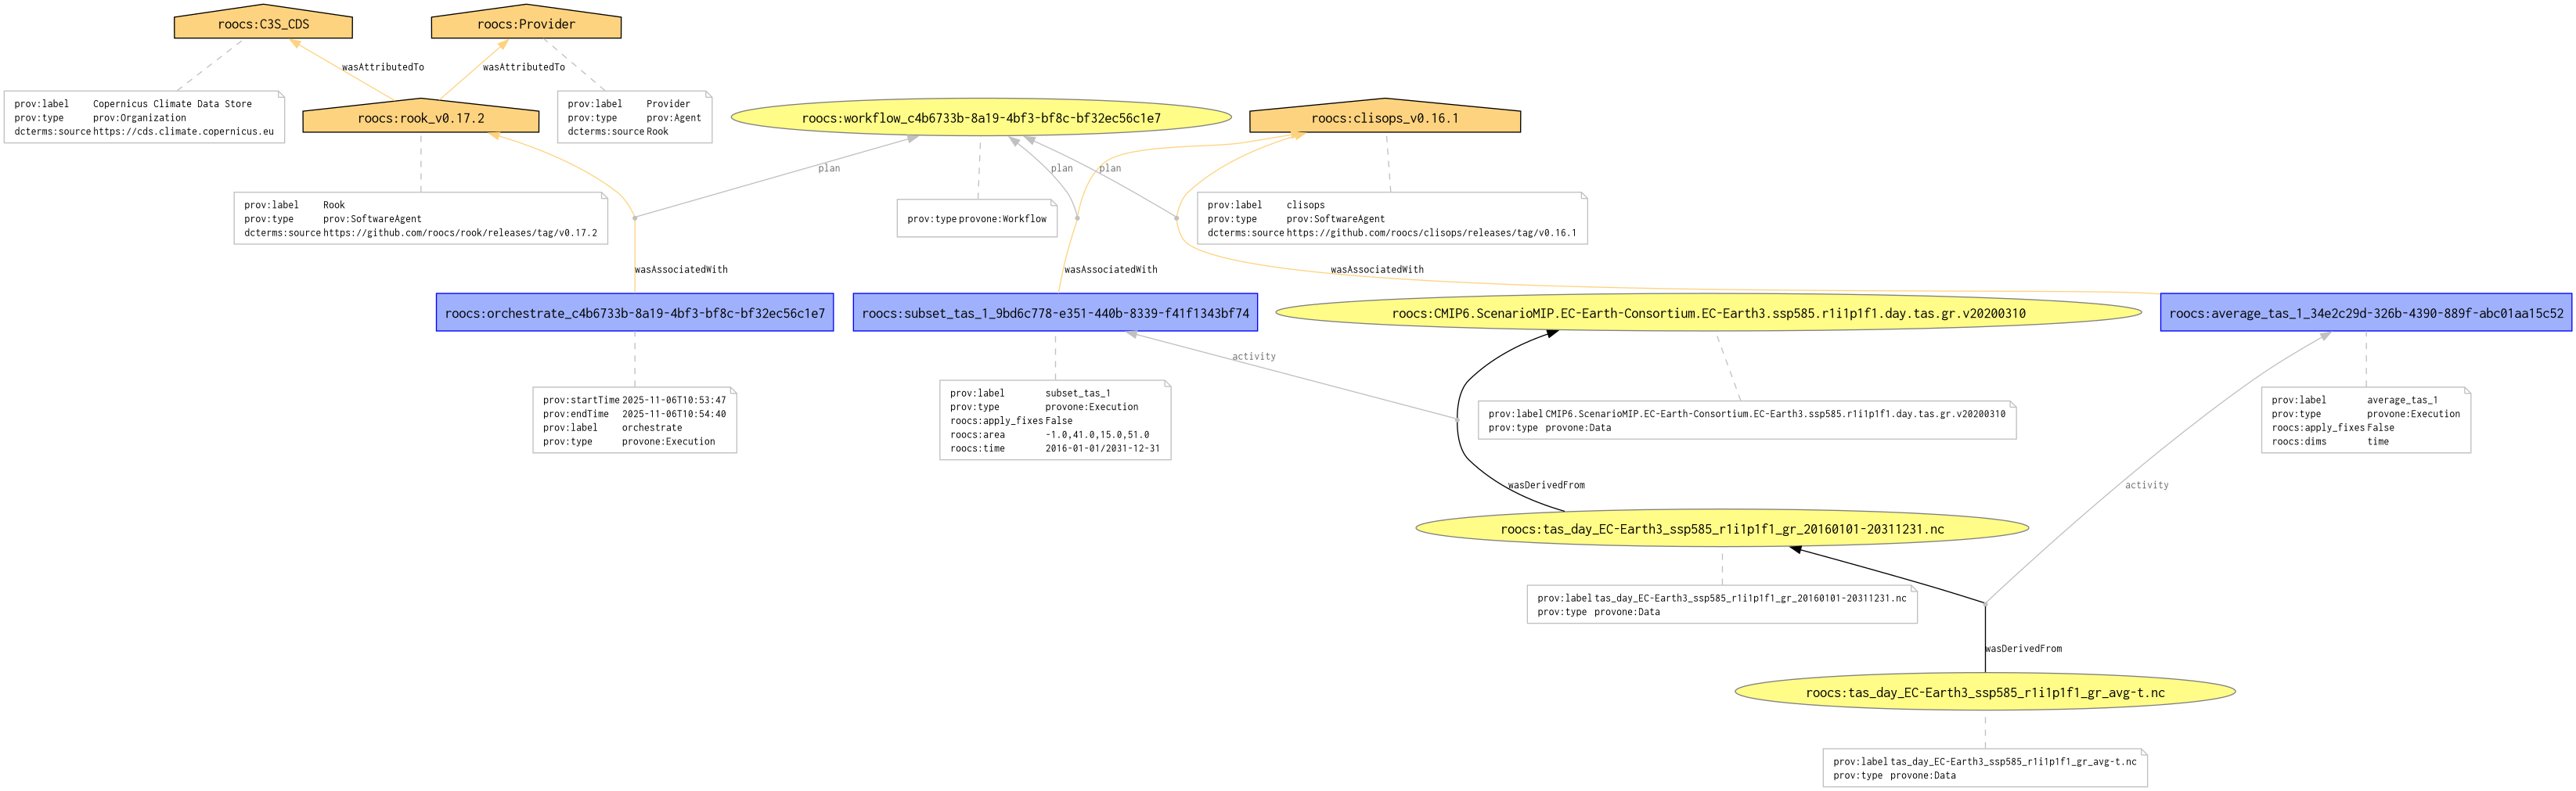

In [10]:
print("\nStep 9: Saving the recipe for next time...")
print("📄 Full recipe (provenance):", resp.provenance())
print("📊 Cooking flowchart:")
Image(resp.provenance_image())  # Shows the workflow diagram


# 10. 💡 Pizza Chef's Tips
Some pro tips for your next data pizza order:

Try different toppings (change 'tas' to 'pr' for precipitation)

Order different slice sizes (adjust time range)

Try different regions (use bboxfinder.com for coordinates)

Explore all your slices (use resp.datasets() for multiple files)

Now you're ready to become a climate data pizza chef! Remember: the tools are powerful, but the concepts are as familiar as ordering your favorite pizza. 🍕🔬